# Introduction to Dimensionality Reduction

When working with machine learning models, datasets with too many features can cause issues like slow computation and overfitting. Dimensionality reduction helps to reduce the number of features while retaining key information. It converts high-dimensional data into a lower-dimensional space while preserving important details.

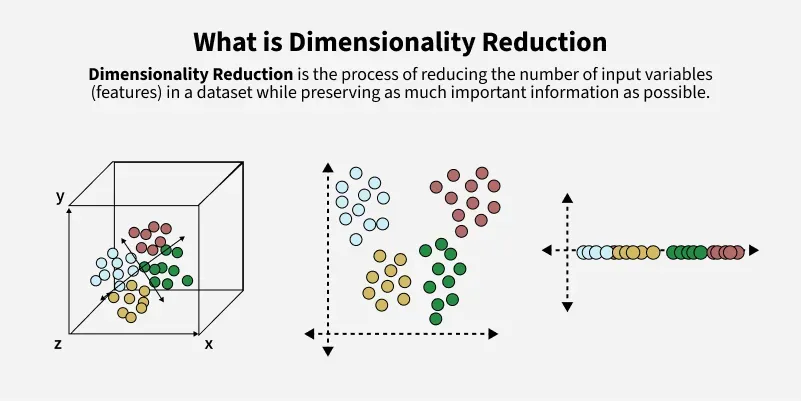

## How Dimensionality Reduction Works?

Lets understand how dimensionality Reduction is used with the help of example. Imagine a dataset where each data point exists in a 3D space defined by axes X, Y and Z. If most of the data variance occurs along X and Y then the Z-dimension may contribute very little to understanding the structure of the data.

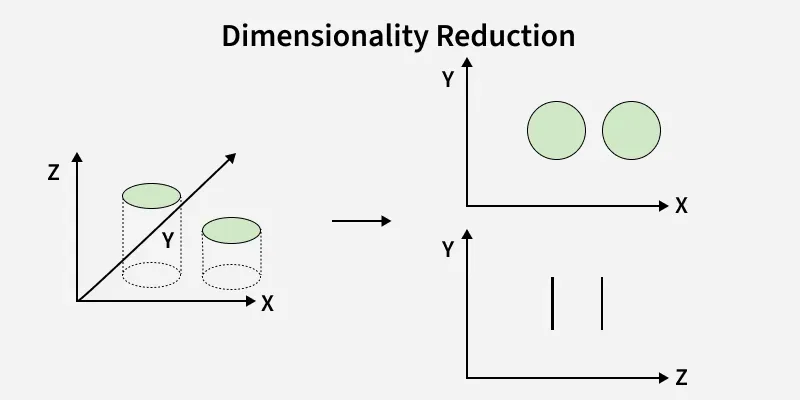

This process makes data analysis more efficient hence improving computation speed and visualization while minimizing redundancy

## Dimensionality Reduction Techniques

Dimensionality reduction techniques can be broadly divided into two categories:

1. **Feature Selection**: This method involves selecting a subset of the original features based on certain criteria, such as correlation with the target variable or importance scores from a model.
* Filter methods rank the features based on their relevance to the target variable.
* Wrapper methods use the model performance as the criteria for selecting features.
* Embedded methods combine feature selection with the model training process.

2. **Feature Extraction**: This method creates new features by transforming the original features into a lower-dimensional space. Common techniques include Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

* **Principal Component Analysis (PCA):** Converts correlated variables into uncorrelated principal components hence reducing dimensionality while maintaining as much variance as possible enabling more efficient analysis.
* **Missing Value Ratio:** Variables with missing data beyond a set threshold are removed, improving dataset reliability.
* **Backward Feature Elimination:** Starts with all features and removes the least significant ones in each iteration. The process continues until only the most impactful features remain, optimizing model performance.
* **Forward Feature Selection:** It begins with one feature, adds others incrementally and keeps those improving model performance.
* **Random Forest:** Random forest uses decision trees to evaluate feature importance, automatically selecting the most relevant features without the need for manual coding, enhancing model accuracy.
* **Factor Analysis:** Groups variables by correlation and keeps the most relevant ones for further analysis.
* **Independent Component Analysis (ICA):** Identifies statistically independent components, ideal for applications like ‘blind source separation’ where traditional correlation-based methods fall short.

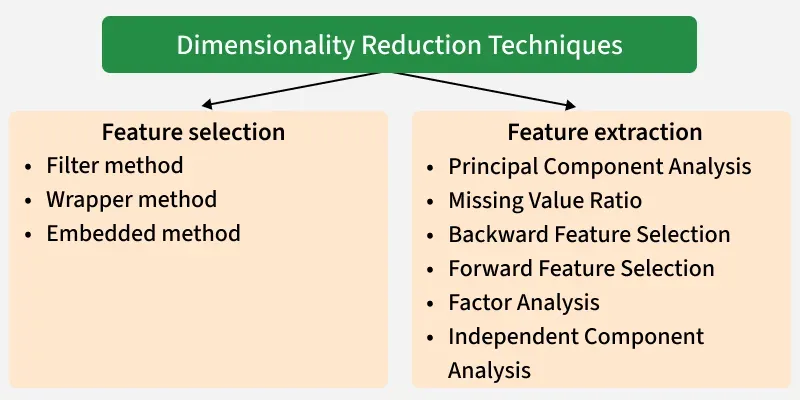

## Real World Use Case

* Text Categirization
* Image Recognition
* Genomics
* Recommender Systems
* Fraud Detection   
* Customer Segmentation

## Disadvantages

* Loss of Information: Reducing dimensions may lead to loss of important information.
* Interpretability: Transformed features may be harder to interpret.
* Computational Cost: Some techniques can be computationally expensive.

                                                      Principal Component Analysis (PCA)         

# Principal Component Analysis (PCA)

PCA (Principal Component Analysis) is a dimensionality reduction technique and helps us to reduce the number of features in a dataset while keeping the most important information. It changes complex datasets by transforming correlated features into a smaller set of uncorrelated components.

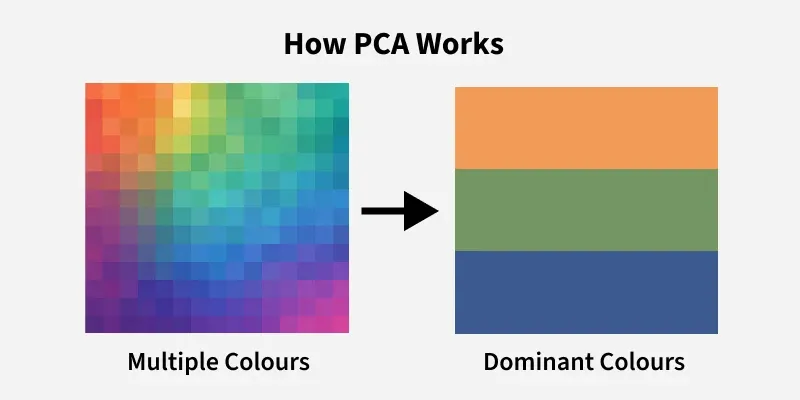

**It helps us to remove redundancy, improve computational efficiency and make data easier to visualize and analyze.**

## How Principal Component Analysis Works

PCA works by finding the directions (principal components) in which the data varies the most. The first principal component captures the most variance, the second captures the second most, and so on. By selecting a subset of these components, we can reduce the dimensionality of the dataset while retaining as much information as possible.

PCA uses linear algebra to transform data into new features called principal components. It finds these by calculating eigenvectors (directions) and eigenvalues (importance) from the covariance matrix. PCA selects the top components with the highest eigenvalues and projects the data onto them, simplifying the dataset.

**It prioritizes the directions where the data varies the most because more variation = more useful information.**

## Steps to Perform PCA

1. **Standardize the Data**: PCA is sensitive to the scale of the data, so it’s important to standardize the features to have a mean of zero and a standard deviation of one.

* A mean of 0
* A standard deviation of 1 

X_scaled = (X - mean) / std

2. **Calculate the Covariance Matrix**: This matrix captures how the features vary together. It helps to identify the relationships between features. The Covariance Matrix is calculated as:
Cov(X) = (1/n) * (X^T * X)

3. **Find the Principal Components**: This involves calculating the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance, while the eigenvalues indicate the amount of variance captured by each component.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

4. **Select the Top Components**: Choose the top k eigenvectors based on their corresponding eigenvalues. These eigenvectors form the new feature space.
top_k_eigenvectors = eigenvectors[:, :k]

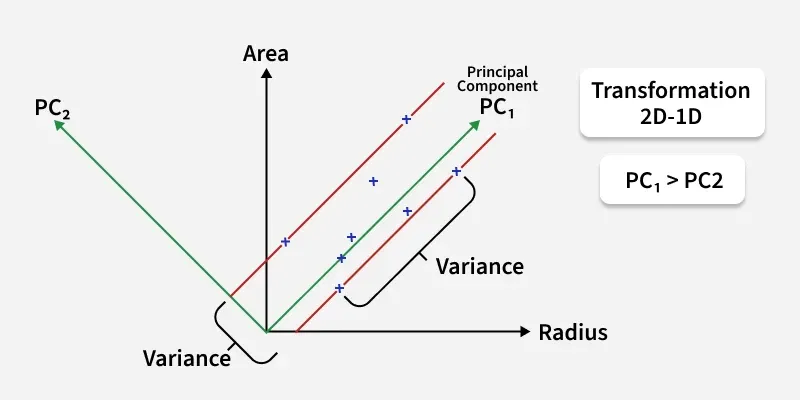

In the above image the original dataset has two features "Radius" and "Area" represented by the black axes. PCA identifies two new directions: PC₁ and PC₂ which are the principal components.

* These new axes are rotated versions of the original ones. PC₁ captures the maximum variance in the data meaning it holds the most information while PC₂ captures the remaining variance and is perpendicular to PC₁.
* The spread of data is much wider along PC₁ than along PC₂. This is why PC₁ is chosen for dimensionality reduction. By projecting the data points (blue crosses) onto PC₁ we effectively transform the 2D data into 1D and retain most of the important structure and patterns.

## Implementation of Principal Component Analysis in Python



In [1]:
# import liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Create a simple dataset

data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

# Standardize the features

X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [2]:
# Applying PCA algorithm

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

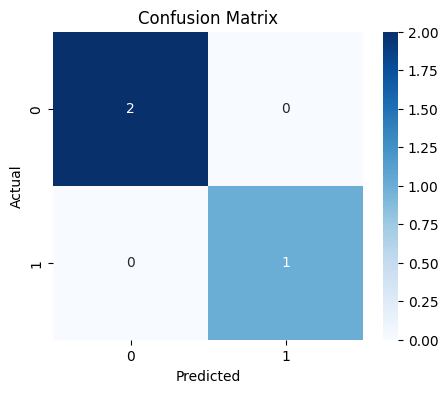

In [3]:
#  Evaluating with Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

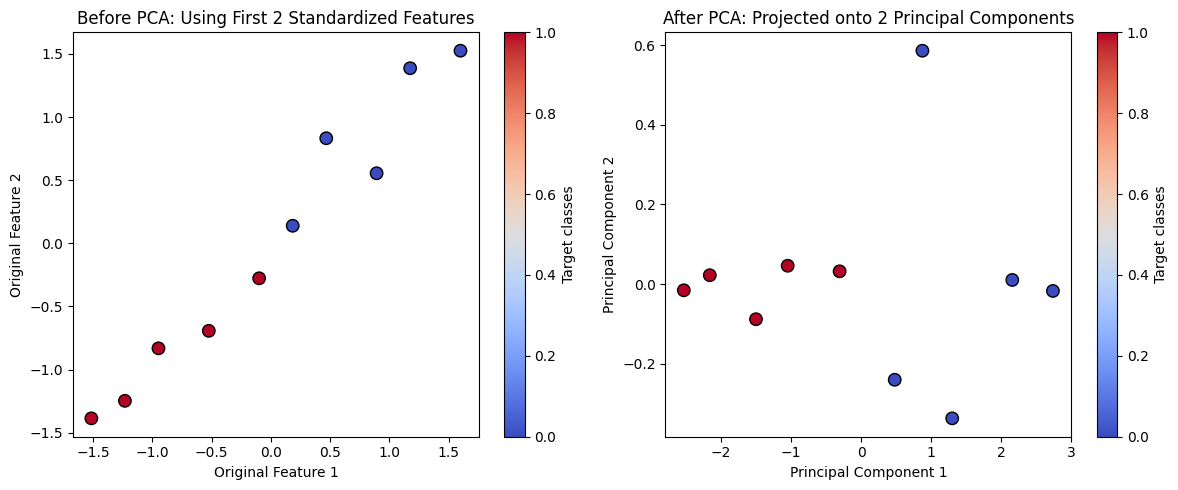

In [4]:
# Visualizing PCA Result

y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

Left Plot Before PCA: This shows the original standardized data plotted using the first two features. There is no guarantee of clear separation between classes as these are raw input dimensions.

Right Plot After PCA: This displays the transformed data using the top 2 principal components. These new components capture the maximum variance often showing better class separation and structure making it easier to analyze or model.

### Advantages of Principal Component Analysis
* Reduces dimensionality while retaining important information.
* Improves computational efficiency.
* Helps to visualize high-dimensional data.
* Can enhance model performance by removing noise and redundancy.

### Disadvantages of Principal Component Analysis
* PCA is a linear technique and may not capture complex relationships in the data.
* The new principal components may be difficult to interpret.
* PCA can be sensitive to outliers which may skew the results.


                                      Feature Importance in PCA: Analyzing Loadings and Biplots         

## Feature Importance in PCA: Analyzing Loadings and Biplots


Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction, data visualization and feature extraction. One challenge after applying PCA is finding which original features contribute the most to the principal components. Feature importance in PCA is determined by loadings matrix which represents the contribution of each original feature to the principal components.

Features with higher absolute values in the loadings have a great impact on the principal component. Now we will perform the PCA algorithm to determine the features using the iris dataset.

Shape of Original Dataset: (150, 4)
Shape after PCA: (150, 2)
Loadings:
[[ 0.89315091  0.3620387 ]
 [-0.46168423  0.88567345]
 [ 0.99487699  0.02349363]
 [ 0.96821173  0.06421425]]


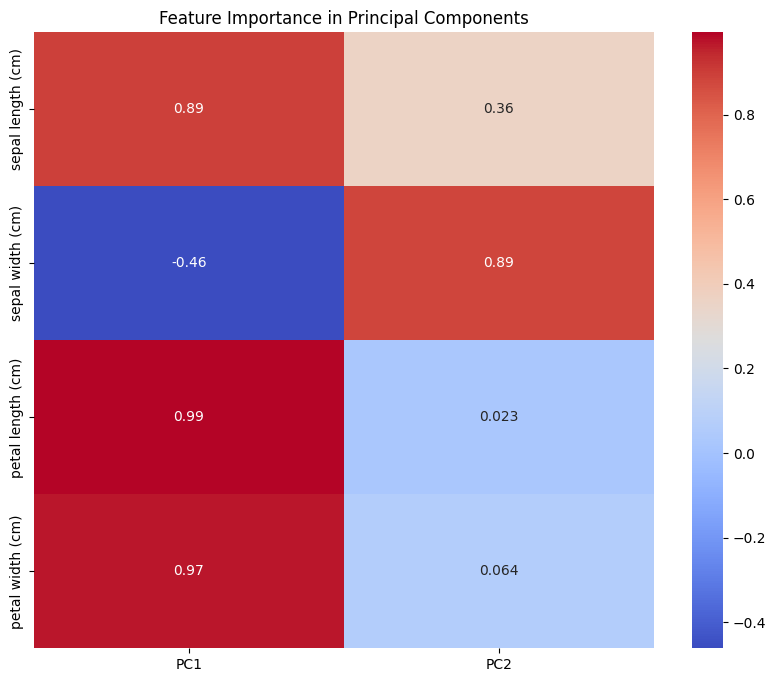

In [5]:
# Data Preprocessing and PCA

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape of Original Dataset:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

#: Calculating and Visualizing Feature Loadings

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print("Loadings:")
print(loadings)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=['PC1', 'PC2'], yticklabels=feature_names)
plt.title('Feature Importance in Principal Components')
plt.show()




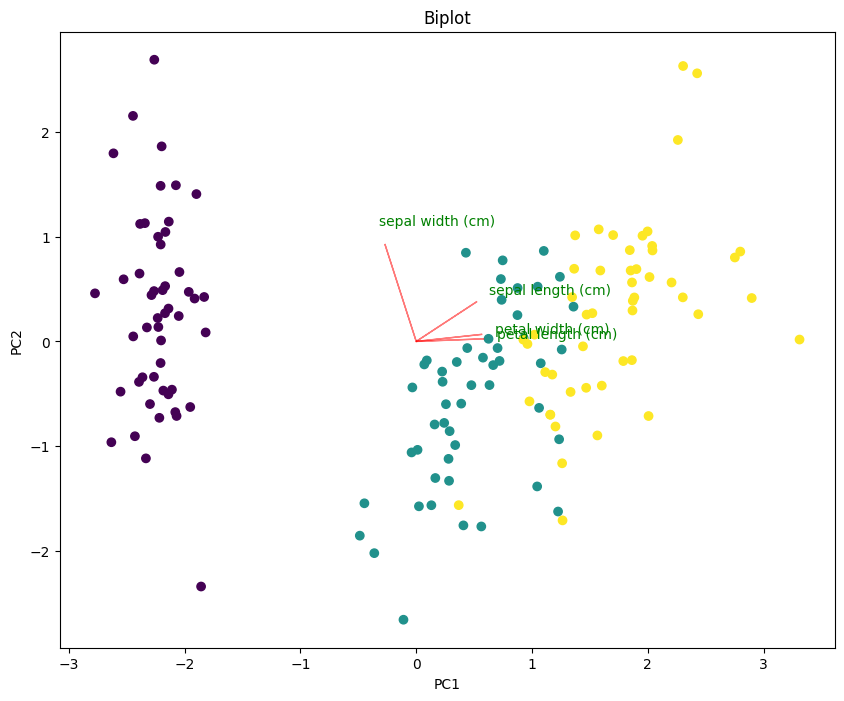

In [6]:
#  Biplot Visualization

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, c=y, cmap='viridis')

    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        plt.text(coeff[i, 0] * 1.2, coeff[i, 1] * 1.2, labels[i], color='g')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.show()

biplot(X_pca, pca.components_.T, feature_names)

## Applications of Feature Importance in PCA

* **Feature Selection:** It can be used for feature selection by identifying and retaining the most important features. This can help in building more interpretable and efficient models.
* **Data Visualization:** By understanding the importance of features one can create more informative visualizations that highlight the key aspects of the data.
* **Model Interpretation:** It helps in interpreting the results of PCA making it easier to understand the underlying structure of the data and the relationships between variables.

## Challenges and Considerations

* **Interpretability:** One of the main challenges of PCA is the interpretability of the principal components. While PCA reduces dimensionality the new components are linear combinations of the original features which may not always be easy to interpret.
* **Information Loss:** It involves selecting a subset of principal components which may led to information loss if important features are not adequately represented in the selected components.
* **Sensitivity to Scaling:** PCA is sensitive to the scaling of the data. It is important to standardize the data before performing PCA to ensure that all features contribute equally to the analysis.

                                                            Linear Discriminant Analysis in Machine Learning         

## Linear Discriminant Analysis in Machine Learning

Linear Discriminant Analysis (LDA) also known as Normal Discriminant Analysis is supervised classification problem that helps separate two or more classes by converting higher-dimensional data space into a lower-dimensional space. It is used to identify a linear combination of features that best separates classes within a dataset.

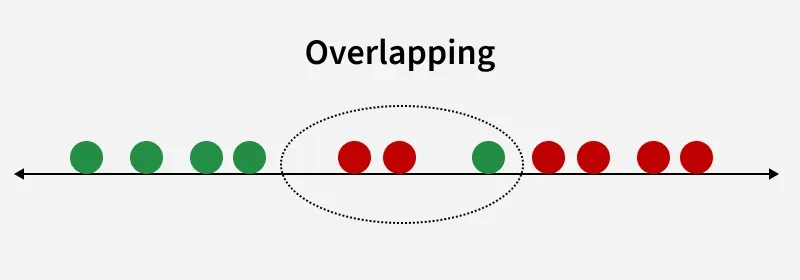

For example we have two classes that need to be separated efficiently. Each class may have multiple features and using a single feature to classify them may result in overlapping. To solve this LDA is used as it uses multiple features to improve classification accuracy. LDA works by some assumptions and we are required to understand them so that we have a better understanding of its working.

## Key Assumptions of LDA

* **Gaussian Distribution:** The data in each class should follow a normal bell-shaped distribution.
* **Equal Covariance Matrices:** All classes should have the same covariance structure.
* **Linear Separability:** The data should be separable using a straight line or plane.

LDA can produce very good results if it meets these assumptions. For example when data points belonging to two classes are plotted, if they are not linearly separable LDA will attempt to find a projection that maximizes class separability.

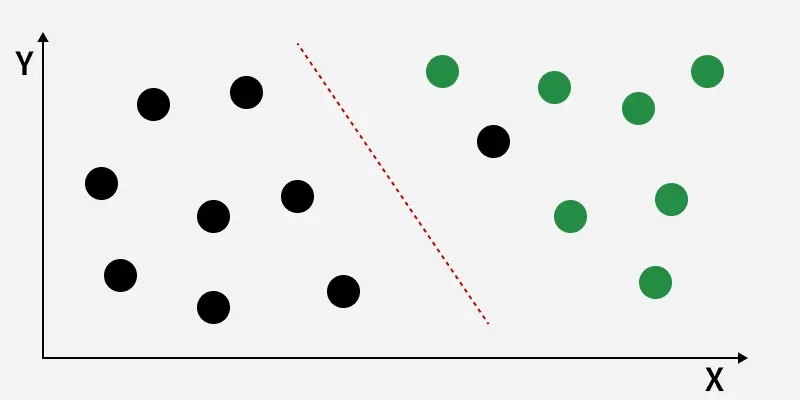

The image shows classes (black and green) that are not linearly separable. LDA finds a new axis (red dashed line) that maximizes the distance between class means while minimizing within-class variance, improving class separation for better classification.

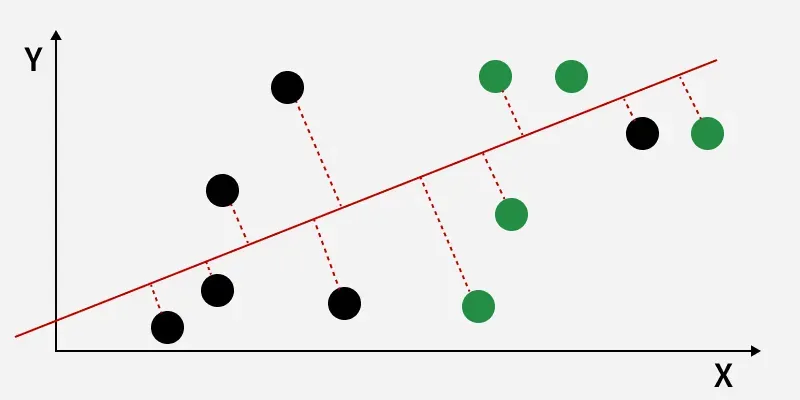

The perpendicular distance from the decision boundary to the data points shows how LDA reduces within-class variation and increases class separability. The data points are then projected onto the new axis, as shown in the figure below. 

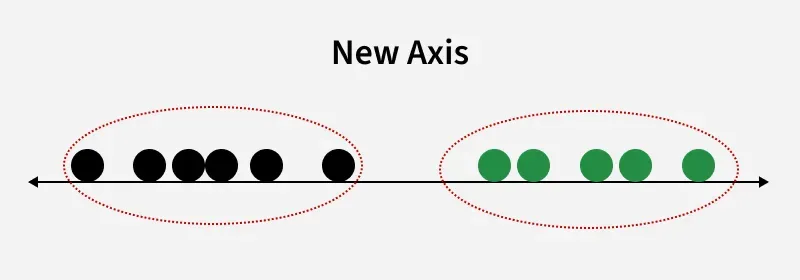

This shows how LDA creates a new axis to project the data and separate two classes along a linear path. However, when class distributions share the same mean, LDA cannot find a separating axis and non-linear discriminant analysis is needed.

## How LDA work

1. **Calculate Class Means**: Compute the mean vector for each class in the dataset.
2. **Compute Scatter Matrices**: Calculate the within-class scatter matrix (S_W) and the between-class scatter matrix (S_B).
3. **Solve Eigenvalue Problem**: Solve the eigenvalue problem for the matrix S_W^-1 * S_B to find the eigenvalues and eigenvectors.
4. **Select Top Eigenvectors**: Choose the top k eigenvectors corresponding to the largest eigenvalues to form the new feature space.
5. **Project Data**: Project the original data onto the new feature space defined by the selected eigenvectors.

## Extensions to LDA

* **Quadratic Discriminant Analysis (QDA):** QDA allows for non-linear decision boundaries by modeling each class with its own covariance matrix, making it suitable for cases where classes are not linearly separable. Each class uses its own estimate of variance (or covariance) allowing it to handle more complex relationships.
* **Regularized Discriminant Analysis (RDA):** RDA introduces regularization to handle cases where the covariance matrices are singular or nearly singular, improving stability and performance in high-dimensional settings.
* **Flexible Discriminant Analysis (FDA):** FDA extends LDA by allowing for non-linear transformations of the feature space, enabling it to capture more complex relationships between features and classes.

## Implementation of LDA using Python



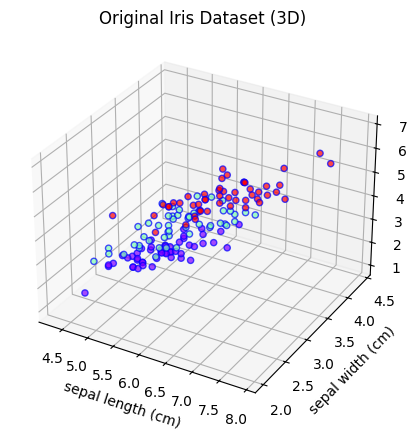

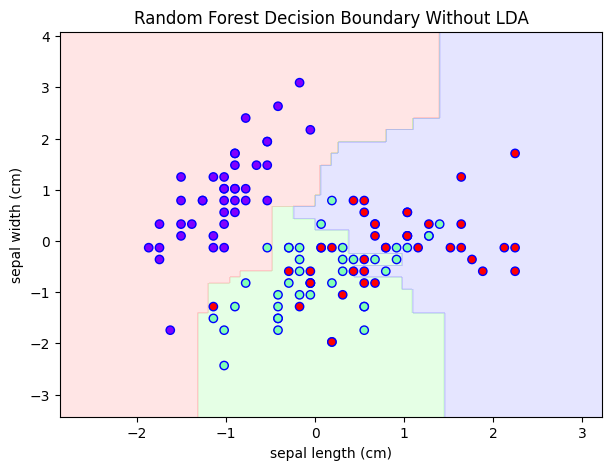

In [7]:
# 1. Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

#Loading the Dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset['target'] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Data Preprocessing
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# . Visualizing the Original Iris Dataset in 3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Original Iris Dataset (3D)')
plt.show()

# . Random Forest Decision Boundary Without LDA

X_train_2D = X_train[:, :2]

rf_without_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_without_lda.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_without_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Forest Decision Boundary Without LDA')
plt.show()



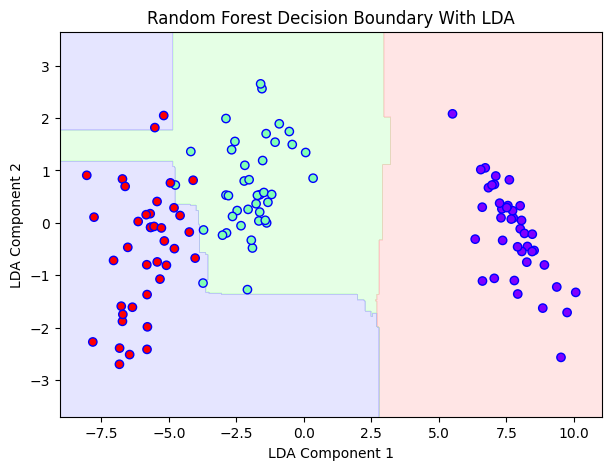

In [8]:
# Applying LDA

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Random Forest Decision Boundary With LDA

rf_with_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_with_lda.fit(X_train_lda, y_train)

x_min, x_max = X_train_lda[:,0].min() - 1, X_train_lda[:,0].max() + 1
y_min, y_max = X_train_lda[:,1].min() - 1, X_train_lda[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_with_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Random Forest Decision Boundary With LDA')
plt.show()



## Advantages of LDA
* LDA is effective for dimensionality reduction while preserving class separability.
* It can improve classification performance by maximizing the distance between classes.
* LDA is computationally efficient and can be used for both binary and multi-class classification problems.

## Disadvantages of LDA
* LDA assumes that the data follows a Gaussian distribution which may not always be the case.
* It also assumes that the covariance matrices of the classes are equal which may not hold true in real-world datasets.
* LDA may not perform well when the classes are not linearly separable or when there are outliers in the data.

## Applications of LDA
* **Face Recognition:** LDA is used in face recognition systems to reduce the dimensionality of facial features while maximizing class separability.
* **Text Classification:** LDA can be applied to text classification tasks to identify the most discriminative features for categorizing documents.
* **Medical Diagnosis:** LDA is used in medical diagnosis to classify patients based on their symptoms and test results, helping to identify diseases or conditions.
* **Customer Segmentation:** LDA can be used in marketing to segment customers based on their purchasing behavior and preferences, allowing for targeted marketing strategies.